# Robot Control WS22/23
## 3R Roboter

Date:    **23.12.2022** \
Author:  **Kaufmann Stefan**


In [ ]:
"""
Date: 20.12.2022
Author: Kaufmann Stefan

Robot Control - Simulation 3R Roboter 
"""

import numpy as np
import sympy as sym
from scipy.integrate import odeint,solve_ivp
import matplotlib.pyplot as plt
from Model import model_nlin_ext
#sym.init_printing()
from IPython.display import display


# 2. Modellbildung

![Alt text](fig/3R_Manipulator.png)



$
J = 
\begin{bmatrix}
J_{v} \\
J_{\omega}
\end{bmatrix}
$ mit 
$J = 
\begin{bmatrix}
\dot{x} \\ \dot{y} \\ \dot{z} \\
\dot{\omega_{x}} \\ \dot{\omega_{y}} \\ \dot{\omega_{z}} 
\end{bmatrix}$


In [ ]:
from Kinematik_3R import *
# Den Sourcecode finden Sie unter Kinematik_3R.py

''' Jacobimatrix '''
# zum Abspielen eingach die gewünsche Variable entkommentieren

#Jv_1
#Jv_2
display(Jv_3)

#Jw_1
#Jw_2
display(Jw_3)


In [ ]:
''' Kinetische Energie und Massenmatrix '''

display(D)

In [ ]:
''' Christoffel Symbole'''
display(C)

# qd  = erste Zeitableitung des Gelenkes
# qdd = zweite Zeitableitung des Gelenkes

In [ ]:
''' mechanische Teilsystem '''
tau = sym.simplify(D*qdd + C*qd + gv.T)
display(tau)
#sym.simplify(tau)

In [ ]:
'''Erweitertes System '''

display(M)



#B+R+C

# 3. Kinematik



In [68]:
'''Vorwärtskinematik'''
from Kinematik_3R import T03sub, q1,q2,q3
import sympy as sym
import Animation as anim
import numpy as np
from numpy import cos, sin
from scipy.optimize import fsolve
import Parameter as param


q = sym.Matrix([1,0,0,0])

X = T03sub*q

display('Vorwärtskinematik:',X)  # Ausgabe  erste Ziele dient der homogenosierung

def T0e(q):
    q1,q2,q3 = q[0],q[1],q[2]

    T = np.array([  param.l1*cos(q1) + param.l2*cos(q1 + q2) + param.l3*cos(q1 + q2 + q3) ,
                    param.l1*sin(q1) + param.l2*sin(q1 + q2) + param.l3*sin(q1 + q2 + q3) ,
                                                                                       0  ])    
    return T

# Winkelstellungen hier Eintragen
q = [0,-1,1]
display(T0e(q))

t_sim = np.linspace(1, 1)                       # Für die Animation
anim.plot(q[0]*t_sim,q[1]*t_sim,q[2]*t_sim,0.1) # Animation


'Vorwärtskinematik:'

Matrix([
[                                                                                                                                                      1],
[l1*cos(q1) + l2*(-sin(q1)*sin(q2) + cos(q1)*cos(q2)) + l3*((-sin(q1)*sin(q2) + cos(q1)*cos(q2))*cos(q3) + (-sin(q1)*cos(q2) - sin(q2)*cos(q1))*sin(q3))],
[  l1*sin(q1) + l2*(sin(q1)*cos(q2) + sin(q2)*cos(q1)) + l3*((-sin(q1)*sin(q2) + cos(q1)*cos(q2))*sin(q3) + (sin(q1)*cos(q2) + sin(q2)*cos(q1))*cos(q3))],
[                                                                                                                                                      0]])

array([ 2.04030231, -0.84147098,  0.        ])

In [71]:
'''Inverse Kinematik'''

def T0e(q):
    # Position welche Angefahren werden soll
    x,y,z = 1.5, 1.5, 0
    q1,q2,q3 = q[0],q[1],q[2]

    T = np.array([  param.l1*cos(q1) + param.l2*cos(q1 + q2) + param.l3*cos(q1 + q2 + q3) -x,
                    param.l1*sin(q1) + param.l2*sin(q1 + q2) + param.l3*sin(q1 + q2 + q3) -y,
                                                                                       0 -z ])    
    return T


root = fsolve(T0e, [0,0,0] )
   
display(root)


anim.plot(root[0]*t_sim,root[1]*t_sim,root[2]*t_sim,0.1)


array([ 32.88522824, -51.2956476 ,  -0.27847013])

### analytische Jacobimatrix und dessen Zeitableitung

$
J_{a}(q) = 
\begin{bmatrix}
I & 0 \\
0 & B^{-1}(\alpha)
\end{bmatrix}
J(q)
$

In [ ]:
# Analytische Jacobimatrix
display(Ja)

# Erste Zeitableitung
display(Ja_diff)

# Peseudoinverse 
display(Jat_inv)



# 4. Simulation

In [ ]:
import Animation as anim
import numpy as np
from scipy.integrate import odeint,solve_ivp
import matplotlib.pyplot as plt
from Model import model_nlin
#from Vorsteuerung import *







x0=[-np.pi/2*0,0,0,  0,0,0]       # x0 = [q1,q2,q3,qd1,qd2,qd3]

# define the discretization points
t_start = 0
t_stop = 10
dt = 1e-1

t_sim = np.linspace(t_start, t_stop, int((t_stop - t_start) / dt + 1))


# Define the controller
class Controller:
  def __init__(self,u,t):   
    #from Vorsteuerung import flat_output
    self.ctr = 'nix'
    self.u  = u
    self.t  = t

u=[0,0,0]

controller = Controller(u,t_sim)

#Wrapper für rechte Seite der Differentialgleichung
rhs=lambda t,x:model_nlin(t,x,controller)
    
solOde = solve_ivp(rhs,                  #zu simulierendes Modell
                    [t_start,t_stop],    #Zeitspanne für Simulation
                    x0,                  #Anfangszustand 
                    t_eval=t_sim,        #Auswertungszeitpunkte
                    atol=1e-9,rtol=1e-6  #Toleranzen
                    )


plt.plot(solOde.t, solOde.y[0]*180/np.pi, 'b', label='q_1')
plt.plot(solOde.t, solOde.y[1]*180/np.pi, 'g', label='q_2')
plt.plot(solOde.t, solOde.y[2]*180/np.pi, 'r', label='q_3')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('q1(t), q2(t), q3(t)')
plt.grid()
plt.show()

anim.plot(solOde.y[0],solOde.y[1],solOde.y[2],dt)

# 5. Reglerentwurf
- Entwurf einer Position- / Kraftregelung
- Simulation und graphische Darstellung

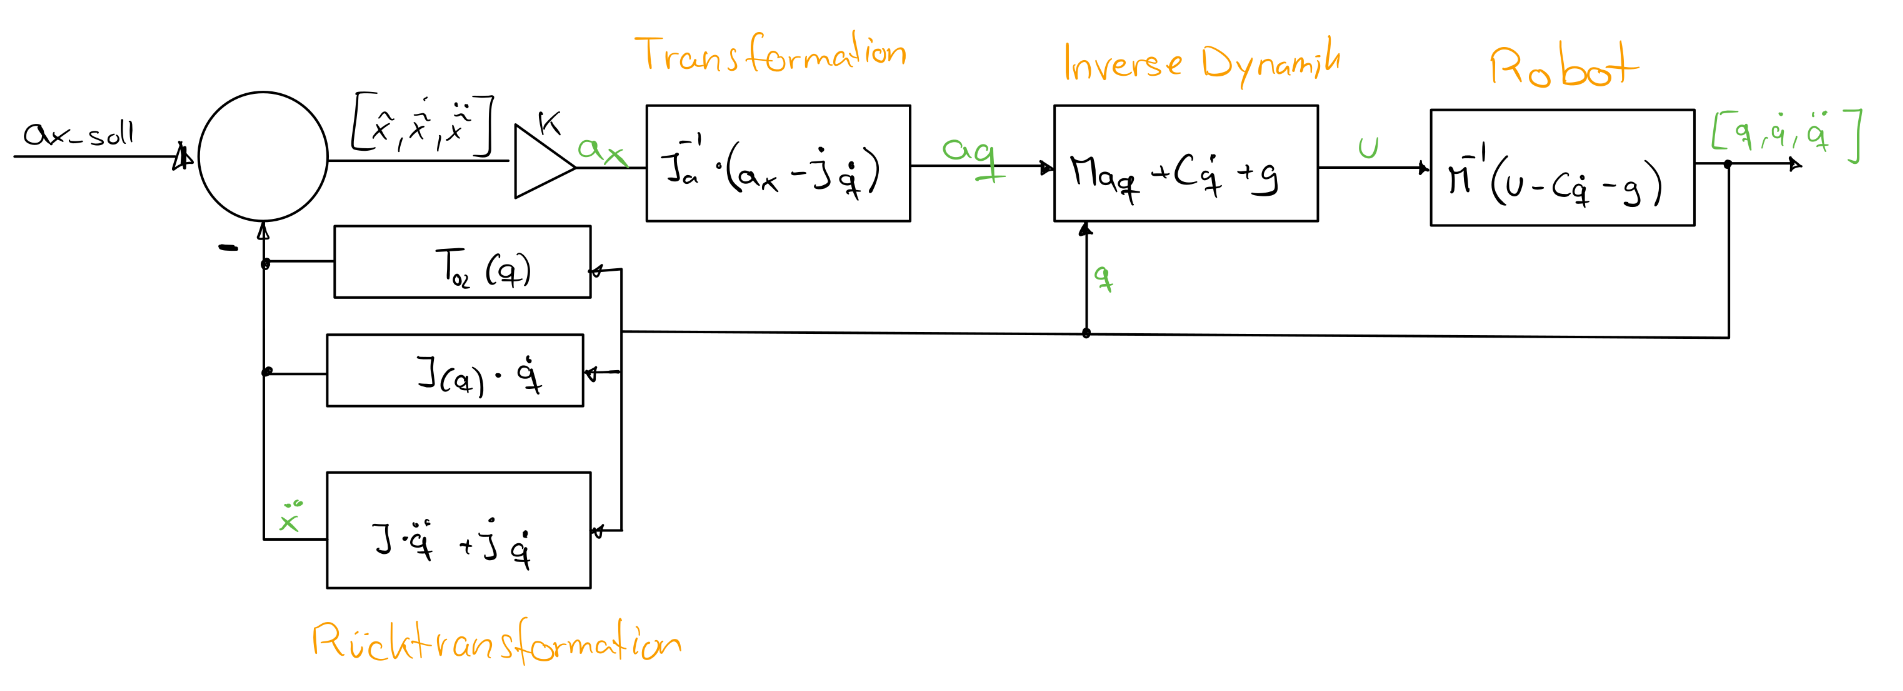

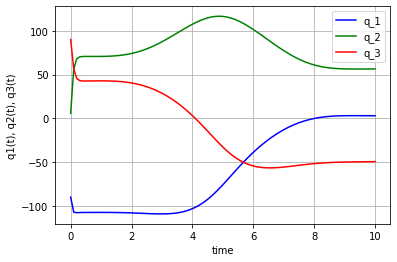

In [3]:
import Animation as anim
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from Model import model_nlin
from Vorsteuerung import *


# x0 = [q1,q2,q3,qd1,qd2,qd3]
# Definieren der Start und Zielposition im Arbeitsraum
x,y = np.array([1,2]), np.array([-1.5,1])

#definition der Ausgangskonfiguration des Roboters
x0=[-np.pi/2,1e-1,np.pi/2, 0,0,0]       


# define the discretization points
t_start = 0
t_stop = 10
dt = 1e-1

t_sim = np.linspace(t_start, t_stop, int((t_stop - t_start) / dt + 1))


# Define the controller
class Controller:
  def __init__(self,u,t_sim):       
    import numpy as np
    self.w     =  np.array([20,20])                                  # Reglerverstärung für jedes Gelenk      
    self.ctr   = 'multivariable'                                     # Auswahl Reglertyp
    self.trn   = True                                                # Soll die Transformation Kartesiche Gelenkraum eingeschalten werden
    self.k0    = np.array([[self.w[0]**2, 0],[0, self.w[1]**2]])
    self.k1    = np.array([[2*self.w[0], 0],[0, 2*self.w[1]]])    
    self.ax    = u 
    self.u     = [0,0,0]
    self.t     = t_sim
u=[0,0,0]

## Trajektorienplanung im Arbeitsraum
# Define the input vector
ax1 = flat_output(t_stop,t_sim,3,x[0],x[1])
ax2 = flat_output(t_stop,t_sim,3,y[0],y[1])

ax= np.vstack((ax1[0,:],ax2[0,:],ax1[1,:],ax2[1,:],ax1[2,:],ax2[2,:]))

controller = Controller(ax,t_sim)



#Wrapper für rechte Seite der Differentialgleichung
rhs=lambda t,x:model_nlin(t,x,controller)
    
solOde = solve_ivp(rhs,                  #zu simulierendes Modell
                    [t_start,t_stop],    #Zeitspanne für Simulation
                    x0,                  #Anfangszustand 
                    t_eval=t_sim,        #Auswertungszeitpunkte
                    atol=1e-9,rtol=1e-6  #Toleranzen
                    )


plt.plot(solOde.t, solOde.y[0]*180/np.pi, 'b', label='q_1')
plt.plot(solOde.t, solOde.y[1]*180/np.pi, 'g', label='q_2')
plt.plot(solOde.t, solOde.y[2]*180/np.pi, 'r', label='q_3')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('q1(t), q2(t), q3(t)')
plt.grid()
plt.show()

In [4]:
anim.plot(solOde.y[0],solOde.y[1],solOde.y[2],dt)

# Debug File

In [ ]:
from Model import *


x = [1,2,3,4,5,6]
ax = [1,1,0,0,0,0]

qx = [0,0,0,0,0,0]
q1 = x[0]
q2 = x[1]
q3 = x[2]

qxx = sym.Matrix.vstack(sym.Matrix(x[2:4]),sym.zeros(4,1))


x_soll =   np.array(ax_soll[0:2])
xd_soll =  np.array(ax_soll[2:4])
xdd_soll = np.array(ax_soll[4:6])
